# Multilayer Perceptron

In [3]:
import numpy as np

In [7]:
def sigmoid(z) :
    return 1/(1 + np.exp(-z))

def derivative_sigmoid(z):
    return z*(1-z)

def Cross_Entropy(y_hat, y):
    if y == 1:
      return -np.log(y_hat)
    else:
      return -np.log(1 - y_hat)
    
def derivative_Cross_Entropy(y_hat, y):
    if y == 1:
      return -1/y_hat
    else:
      return 1 / (1 - y_hat)

In [9]:
def Dense(A_in, W, b, activation_function):
    """
    Computes dense layer
    Args:
      a_in (ndarray (n, )) : Data, 1 example 
      W    (ndarray (n,j)) : Weight matrix, n features per unit, j units
      b    (ndarray (j, )) : bias vector, j units  
      g    activation function (e.g. sigmoid, relu..)
    Returns
      a_out (ndarray (j,))  : j units
    """
    Z = A_in @ W + b
    A_out = g(Z)             
    return(A_out)

In [ ]:
def my_sequential(x, W1, b1, W2, b2, W3, b3):
    a1 = my_dense(x, W1, b1, sigmoid)
    a2 = my_dense(a1, W2, b2, sigmoid)
    a3 = my_dense(a2, W3, b3, sigmoid)

    return a3

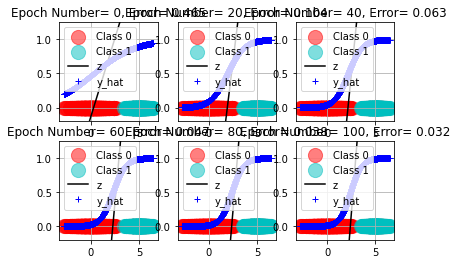

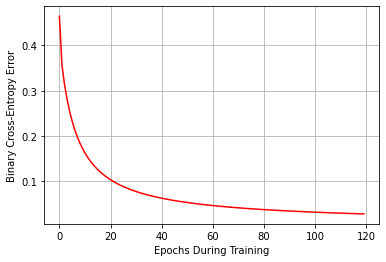

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
  return 1 / (1 + np.exp(-z))
 

 
area = 200
N = 500
mu, sigma = 0, 1 # mean and standard deviation
x_0 = np.random.normal(mu, sigma, N)
x_1 = np.random.normal(mu + 5, sigma*0.50, N)
X = [x_0, x_1]
Y = [np.zeros_like(x_0), np.ones_like(x_1)]
X = np.array(X)
Y = np.array(Y)
X = X.reshape(X.shape[0]*X.shape[1])
Y = Y.reshape(Y.shape[0]*Y.shape[1])
# Define the weights
W = np.random.uniform(low=-0.01, high=0.01, size=(1,))
W_0 = np.random.uniform(low=-0.01, high=0.01, size=(1,))
 
Epoch = 120
eta = 0.001
# Start training
subplot_counter = 1
E = []
for ep in range(Epoch):
    # Shuffle the train_data X and its Labels Y
    random_index = np.arange(X.shape[0])
    np.random.shuffle(random_index)
    e = []
    for i in random_index:
        Z = W*X[i] + W_0
        Y_hat = sigmoid(Z)
        # Compute the Error
        e.append(Cross_Entropy(Y_hat, Y[i]))
        # Compute gradients
        dEdW = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)*X[i]
        dEdW_0 = derivative_Cross_Entropy(Y_hat, Y[i])*derivative_sigmoid(Y_hat)
        # Update the parameter
        W = W - eta*dEdW
        W_0 = W_0 - eta*dEdW_0
    if ep % 20 == 0:
        plt.subplot(2, 3, subplot_counter)
        plt.scatter(x_0, np.zeros_like(x_0), s=area, c='r', alpha=0.5, label="Class 0")
        plt.scatter(x_1, np.zeros_like(x_1), s=area, c='c', alpha=0.5, label="Class 1")
        minimum = np.min(X)
        maximum = np.max(X)
        s = np.arange(minimum, maximum, 0.01)
        plt.plot(s, W * s + W_0, '-k', label="z")
        plt.plot(s, sigmoid(W * s + W_0), '+b', label="y_hat")
        plt.legend()
        plt.ylim(-0.2, 1.25)
        plt.grid()
        plt.title("Epoch Number= %d" % ep + ", Error= %.3f" % np.mean(e))
        subplot_counter += 1
    E.append(np.mean(e))
plt.figure()
plt.grid()
plt.xlabel("Epochs During Training")
plt.ylabel("Binary Cross-Entropy Error")
plt.plot(E, c='r')
plt.show()

In [16]:
import numpy as np

# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Define the derivative of the sigmoid function
def sigmoid_derivative(x):
    return x * (1 - x)

# Define the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize the weights randomly
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.weights2 = np.random.randn(hidden_size, output_size)

    def forward(self, X):
        # Perform the forward pass through the network
        self.hidden_layer = sigmoid(np.dot(X, self.weights1))
        self.output_layer = sigmoid(np.dot(self.hidden_layer, self.weights2))
        return self.output_layer

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            # Perform the forward pass
            output = self.forward(X)

            # Calculate the error and loss
            error = y - output
            loss = -np.mean(y * np.log(output) + (1 - y) * np.log(1 - output))

            # Backpropagation
            delta_output = error * sigmoid_derivative(output)
            error_hidden = np.dot(delta_output, self.weights2.T)
            delta_hidden = error_hidden * sigmoid_derivative(self.hidden_layer)

            # Update the weights using gradient descent
            self.weights2 += learning_rate * np.dot(self.hidden_layer.T, delta_output)
            self.weights1 += learning_rate * np.dot(X.T, delta_hidden)

            # Print the loss for every 1000 epochs
            if epoch % 1000 == 0:
                print(f"Epoch: {epoch}, Loss: {loss}")

    def predict(self, X):
        # Make predictions for new input data
        output = self.forward(X)
        predictions = np.round(output)
        return predictions

# Generate random input data for binary classification
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Create a neural network with 2 input units, 2 hidden units, and 1 output unit
nn = NeuralNetwork(input_size=2, hidden_size=2, output_size=1)

# Train the neural network using gradient descent and binary cross entropy loss
nn.train(X, y, epochs=10000, learning_rate=0.1)

# Make predictions
predictions = nn.predict(X)

# Print the predictions
print("Predictions:")
for i in range(len(predictions)):
    print(X[i], predictions[i])


Epoch: 0, Loss: 0.6951084076115458
Epoch: 1000, Loss: 0.6895779039372214
Epoch: 2000, Loss: 0.6846073916032359
Epoch: 3000, Loss: 0.6763190708915389
Epoch: 4000, Loss: 0.6582782765192854
Epoch: 5000, Loss: 0.6312452803011298
Epoch: 6000, Loss: 0.6054992631064032
Epoch: 7000, Loss: 0.5848642715884698
Epoch: 8000, Loss: 0.5688494216632669
Epoch: 9000, Loss: 0.5559397168721946
Predictions:
[0 0] [1.]
[0 1] [1.]
[1 0] [0.]
[1 1] [0.]
